IMPORT LIBRARIES

- In this example there are only libraries needed for the example code.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

READ THE DATA:

- In this challenge you will use the dataset "Optical recognition of handwritten digits", usually indicated as Digits.
>In the following example, how to load and read  the info of  this dataset, and visualize some of the samples.


Image Data Shape (1797, 64)
Label Data Shape (1797,)


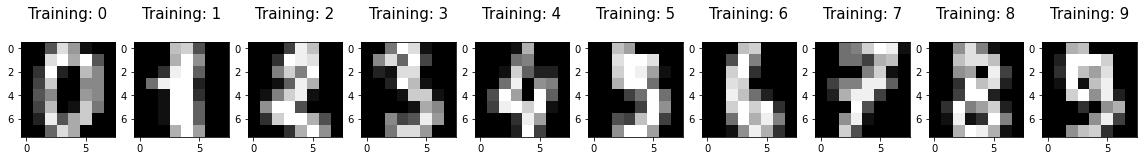

In [2]:
digits = load_digits()

print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 15)


FEATURE EXTRACTION

- Transform the raw images into feature data:
>To apply a classifier on the images, we can use the pixel values as features. We need to flatten the image and turn the data in a matrix with samples on the rows and features on the columns.


In [3]:
n_samples = len(digits.images)
digits_data = digits.images.reshape((n_samples, -1))
digits_class = digits.target

FEATURE ENGINEERING AND TRAINING/TEST OF THE LEARNING MODEL 

- Evaluate if you need features normalization, feature selection or dimensionality reduction;
- Find the best parameter for a classifier using a grid search approach applied on a stratified k-fold cross validation;
- Evaluate the accuracy and the confusion matrix.

>Use these classifiers:
- SVM (different models and different kernels), see https://scikit-learn.org/stable/modules/svm.html
- Ensemble methods (e.g., RandomForest, AdaBoost, GradientBoosting, etc.), see https://scikit-learn.org/stable/modules/ensemble.html

>>Which one is the best? 
- Can you find a combination rule (e.g. majority voting, simple average, etc.) to build an ensemble of classifiers (e.g. decision trees, Naïve Bayes, etc.) with similar performances?



Feature Engineering

In [4]:
# Feature Normalisation
digits_data = normalize(digits_data)

In [5]:
# Dimensionality Reduction
X = digits_data
pca = PCA(n_components='mle', svd_solver='full')
digits_data = pca.fit_transform(X)

In [6]:
# Feature Selection
lsvc = LinearSVC(C=0.09, penalty="l2", dual=False).fit(digits_data, digits_class)
model = SelectFromModel(lsvc, prefit=True)
digits_data = model.transform(digits_data)

In [7]:
# As an example in the following code lines there is a pipeline with standard scaler and linear SVM
# where the C parameter is optimized with a grid search on a stratified cross validation

# As an example, let's fix some variables
# n_values = 5
# lower_value_C = -5
# higher_value_C = 5

# Let's apply a stratified 10-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=31)

# Let's build a pipeline with only a scaler and a linear SVM

# Let's build a structure for the grid search with a set of parameters for the techniques in the pipeline
# Be careful to the double underscore between the name you chose in the pipeline and the name of the parameter
# Be careful also to the function logspace for the range of the C values

# SVM Pipeline (99.22% with Feature Engineering)
pipe = Pipeline([('scaler', MinMaxScaler()),('svc',SVC())])
parameters={'svc__kernel': ['linear', 'poly', 'rbf']}

## Ensemble Methods
# Random Forest (>90%)
# pipe = Pipeline([('rfc',RandomForestClassifier())])
# parameters={'rfc__n_estimators': [200,500,1000], 'rfc__criterion': ['gini', 'entropy'], 'rfc__max_depth': [2,5,8,11], 'rfc__max_features': ['auto', 'sqrt', 'log2'], 'rfc__random_state': [31,32,35,40,42]}

# Adaboost (Deteriorates the performance - ~60% with sincere hyperparameter tuning)
# pipe = Pipeline([('abc',AdaBoostClassifier())])
# parameters={'abc__random_state': range(0,42,2),'abc__n_estimators': [100,500,1000], 'abc__learning_rate': [0.001,0.05]}

# Gradient Boosting (Accuracy lies in the range (80,90]%)
# pipe = Pipeline([('gbc',GradientBoostingClassifier())])
# parameters={'gbc__learning_rate': [0.01, 0.001], 'gbc__n_estimators': [200, 500, 1000], 'gbc__max_depth': [2,4,6,8,10], 'gbc__max_features': ['auto']}

# Majority Voting (98.72%)
# eclf = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter = 1000)), ('knn', KNeighborsClassifier(n_neighbors=5)), ('gnb', GaussianNB())], weights=[3,5,1])
# pipe = Pipeline([('scaler', MinMaxScaler()), ('vc', eclf)])
# parameters={}

# Let's apply the grid search function
grid_search = GridSearchCV(pipe, parameters, cv=cv)
# Let's train and test the learning system
grid_search.fit(digits_data, digits_class)

# Here we just print the best accuracy and the corresponding values for the parameters
print("The best parameters are %s with an accuracy of %0.4f"%(grid_search.best_params_, 100*grid_search.best_score_))

The best parameters are {'svc__kernel': 'rbf'} with an accuracy of 99.2207


In [8]:
# Confusion Matrix
y_pred = grid_search.best_estimator_.predict(digits_data)
y = digits_class
confusion_matrix(y, y_pred)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 181,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0, 179]])